In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,8)

def linear(_x, _n, _m):
    return _m*_x+_n

In [18]:
alpha = 25/1000000
TM = 293.15
T0 = 273.15

def getR(r):
    return r*(1+alpha*(TM-T0))

<h1>E18 Kirchhoffsche Regeln und temperaturabhängige Widerstände</h1>

In [19]:
R0 = getR(100)
R1 = getR(1800)
R2 = getR(100)
R3 = getR(1000)
R4 = getR(10000)

UB = 5-0.8*10**-3*(TM-T0)
A = 3.9083*10**-3
B = -5.775*10**-7

<h2>Aufgabe 0</h2>

<p>Berechnen Sie zur Vorbereitung des Praktikumsversuchs den Widerstandswert des Pt-100, die
Brückenspannung der in Abb. 1 gezeigten Brückenschaltung sowie die Spannung Ua in Abb. 2 in
Abhängigkeit von der Temperatur im Intervall von 0°C – 100°C und stellen Sie diese als Graph dar.
Überprüfen Sie mittels linearer Regression der berechneten Werte, ob in guter Näherung Linearität
vorliegt.</p>

<h3>Widerstand des Pt-100</h3>

$$R(T) = R_0 \cdot (1+AT+BT^2)$$

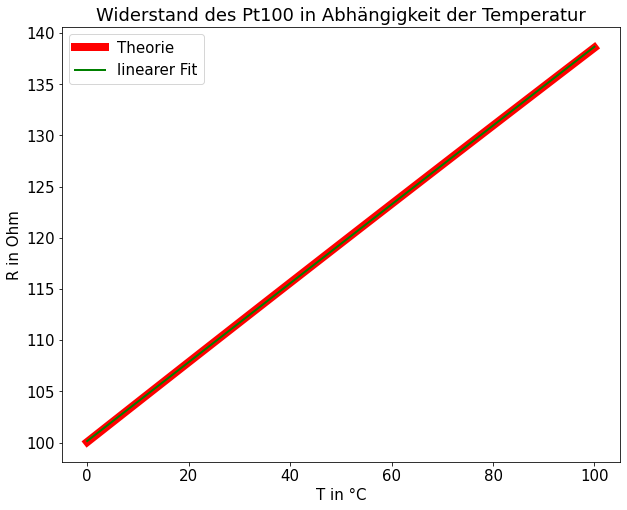

In [20]:
T = np.linspace(0,100,100)
R = R0*(1+A*T+B*T**2)

m, cov = curve_fit(linear,T,R)

plt.plot(T,R, lw=8, color="red", label="Theorie")
plt.plot(T, linear(T,m[0], m[1]), lw =2, color="green", label="linearer Fit")

plt.xlabel("T in °C")
plt.ylabel("R in Ohm")
plt.title("Widerstand des Pt100 in Abhängigkeit der Temperatur")
plt.legend()
plt.show()

<h3>Brückenspannung</h3>

$$U_{Br}=U_B \cdot \dfrac{R_1 \cdot (R_2-R_{Pt})}{(R_{Pt}+R_1)(R_2+R_1)}$$

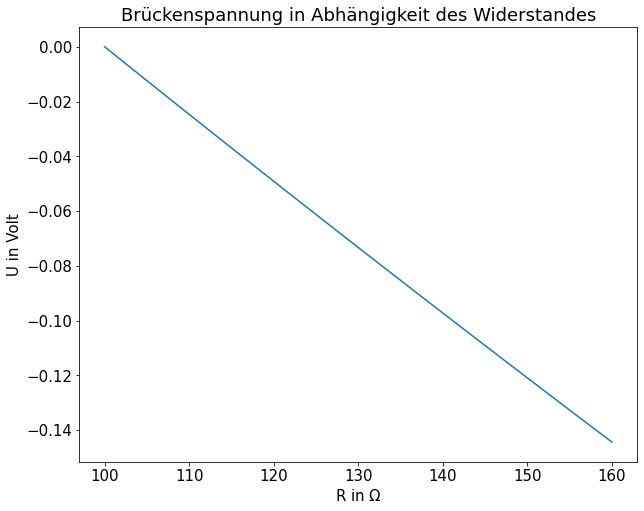

In [21]:
PT = np.linspace(100,160,100)
UBr = UB*R1*(R2-PT)/((PT+R1)*(R2+R1))

plt.plot(PT, UBr)
plt.xlabel(r"R in $\Omega$")
plt.ylabel("U in Volt")
plt.title("Brückenspannung in Abhängigkeit des Widerstandes")
plt.show()

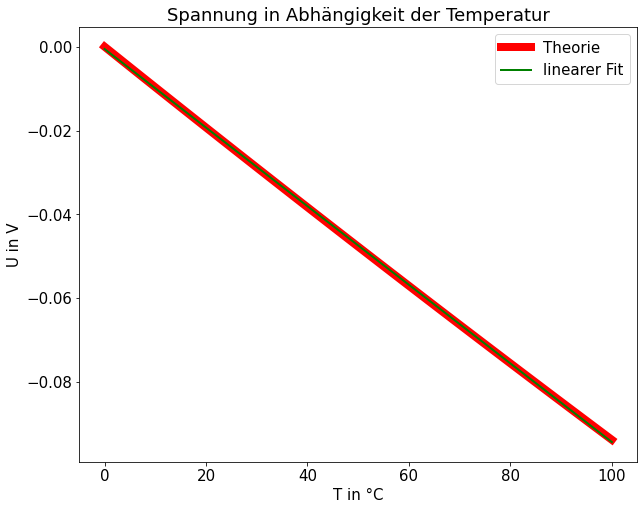

In [22]:
UBr2 = UB*R1*(R2-R)/((R+R1)*(R2+R1))

m, cov = curve_fit(linear, T,UBr2)

plt.plot(T,UBr2, color="red", label="Theorie", lw=8 )
plt.plot(T,linear(T,m[0], m[1]), color="green", label="linearer Fit", lw=2)
plt.xlabel("T in °C")
plt.ylabel("U in V")
plt.title("Spannung in Abhängigkeit der Temperatur")
plt.legend()
plt.show()

<h3> Messspannung $U_a$ in Abhängigkeit der Temperatur</h3>

$$U_a = U_B \dfrac{R_4 R_1}{R_3} \cdot \dfrac{R_2 - R_0 (1+AT+BT^2)}{((R_0 (1+AT+BT^2)+R_1)(R_2+R_1)} $$

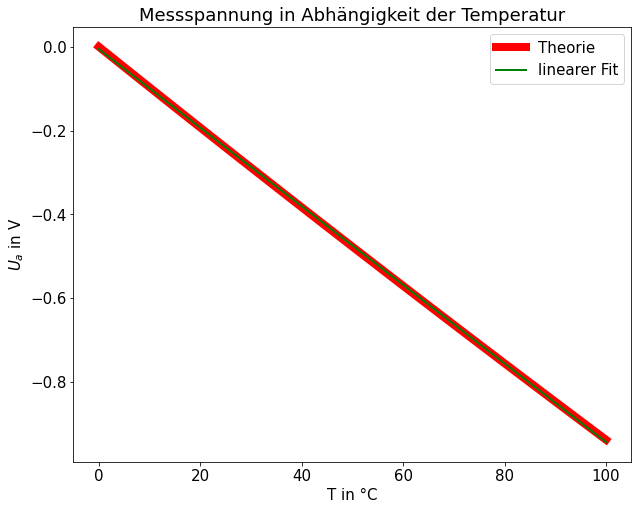

m = -0.0055+-0.0005
n = -0.0094+-1e-05


In [23]:
Ua = UB * R4*R1/R3 * (R2-R0*(1+A*T+B*T**2))/((R0*(1+A*T+B*T**2)+R1)*(R2+R1))

k, cov = curve_fit(linear,T,Ua)

n = k[1]
m = k[0]

dn = np.sqrt(cov[1,1])
dm = np.sqrt(cov[0,0])


plt.plot(T,Ua, lw=8, color="red", label="Theorie")
plt.plot(T, linear(T, m, n), lw=2, color="green", label="linearer Fit")
plt.xlabel("T in °C")
plt.ylabel(r"$U_a$ in V")
plt.title("Messspannung in Abhängigkeit der Temperatur")
plt.legend()
plt.show()
print(f"m = {np.round(m,4)}+-{np.round(dm,5)}")
print(f"n = {np.round(n,4)}+-{np.round(dn,5)}")

<h2>Aufgabe 2</h2>

<p>Ermitteln Sie die Messunsicherheit Ihres Thermometers unter Zuhilfenahme der Ergebnisse aus
Aufgabe 0 und der Toleranz des Pt-100.</p>

In [24]:
dR4 = R4*0.1/100
dR3 = R3*0.1/100
dR2 = R2*0.1/100
dR1 = R1*0.1/100
dUB = UB*0.04

In [25]:
R4t,R3t,R2t,R1t = sp.symbols("R4 R3 R2 R1")
UBt = sp.symbols("U_B")
Ptt = sp.symbols("R_{Pt}")
f = R4t/R3t*(UBt*R1t*(Ptt-R2t)/((Ptt+R1t)*(R2t+R1t)))
display(f)

R1*R4*U_B*(-R2 + R_{Pt})/(R3*(R1 + R2)*(R1 + R_{Pt}))

In [26]:
#Fehler anzeigen
dR4t, dR3t, dR2t, dR1t = sp.symbols("Delta_R4 Delta_R3 Delta_R2 Delta_R1")
dUBt = sp.symbols("Delta_U")

pR4 = sp.simplify(sp.diff(f,R4t))
pR3 = sp.simplify(sp.diff(f,R3t))
pR2 = sp.simplify(sp.diff(f,R2t))
pR1 = sp.simplify(sp.diff(f,R1t))
pUB = sp.simplify(sp.diff(f,UBt))

dTt = (sp.sqrt((pR4*dR4t)**2+(pR3*dR3t)**2+(pR2*dR2t)**2+(pR1*dR1t)**2+(pUB*dUBt)**2))
display(dTt)
dT = sp.simplify(dTt.subs([(R4t, R4), (R3t, R3), (R2t,R2), (R1t,R1), (UBt, UB), (dR4t, dR4), (dR3t, dR3), (dR2t, dR2), (dR1t,dR1), (dUBt, dUB)]))

sqrt(Delta_R1**2*R4**2*U_B**2*(R2 - R_{Pt})**2*(R1*(R1 + R2) + R1*(R1 + R_{Pt}) - (R1 + R2)*(R1 + R_{Pt}))**2/(R3**2*(R1 + R2)**4*(R1 + R_{Pt})**4) + Delta_R2**2*R1**2*R4**2*U_B**2/(R3**2*(R1 + R2)**4) + Delta_R3**2*R1**2*R4**2*U_B**2*(R2 - R_{Pt})**2/(R3**4*(R1 + R2)**2*(R1 + R_{Pt})**2) + Delta_R4**2*R1**2*U_B**2*(R2 - R_{Pt})**2/(R3**2*(R1 + R2)**2*(R1 + R_{Pt})**2) + Delta_U**2*R1**2*R4**2*(R2 - R_{Pt})**2/(R3**2*(R1 + R2)**2*(R1 + R_{Pt})**2))

In [27]:
dUA = []
for i in R:
    dUA.append(sp.N(dT.subs(Ptt, i)))

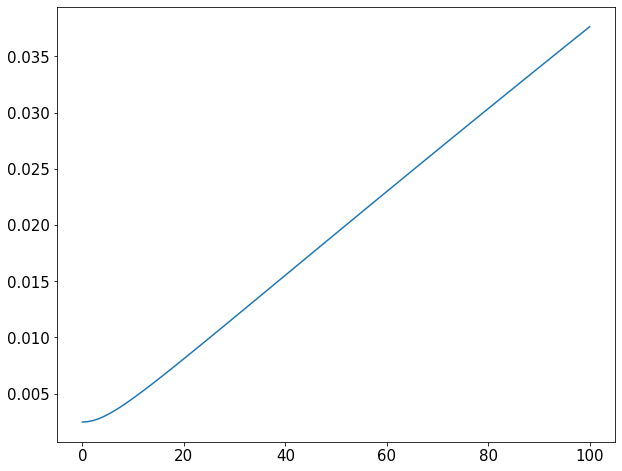

In [28]:
plt.plot(T,dUA)

In [29]:
mt,nt, Ut = sp.symbols("m n U")
final = Ut/mt -nt/mt
display(final)

U/m - n/m

In [30]:
pUt = sp.diff(final, Ut)
pmt = sp.diff(final, mt)
pnt = sp.diff(final, nt)

dmt, dnt, dUt = sp.symbols("Delta_m Delta_n Delta_U")

dTempt = sp.sqrt((pUt *dUt)**2+(pmt * dmt)**2+(pnt*dnt)**2)
display(dTempt)
dTempt = dTempt.subs([(mt, m), (nt, n), (dmt, dm), (dnt, dn)])
display(dTempt)

sqrt(Delta_U**2/m**2 + Delta_m**2*(-U/m**2 + n/m**2)**2 + Delta_n**2/m**2)

182.793344204563*sqrt(Delta_U**2 + 0.0083966135850306*(-U - 0.00937800288902526)**2 + 7.50095716734819e-11)

In [31]:
dTemp = []
for i in range(len(T)):
    dTemp.append(sp.N(dTempt.subs(([(Ut, Ua[i]), (dUt, dUA[i])]))))

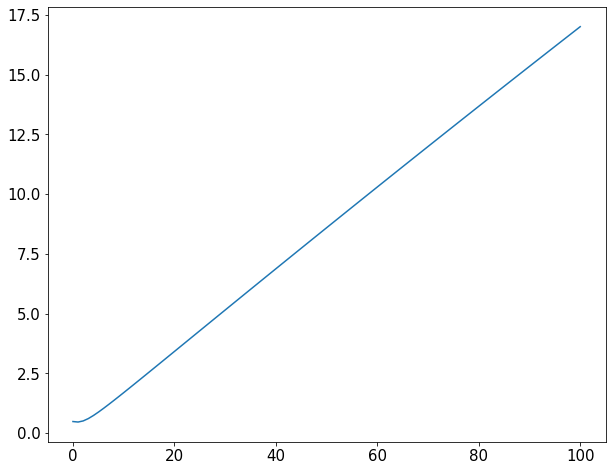

In [32]:
plt.plot(T, dTemp)